# Fine-tuning SAM2

## Fine-tuning 

In [1]:
# import numpy as np
# import torch
# import cv2
# import os

# from PIL import Image
# from pathlib import Path
# import matplotlib.pyplot as plt
# import sys
# import os
# import numpy as np
# import torch
# import matplotlib.pyplot as plt

# import torchvision.transforms.functional as F
# from torchvision.ops import masks_to_boxes
# import os
# # if using Apple MPS, fall back to CPU for unsupported ops
# os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"
# import numpy as np
# import torch
# import matplotlib.pyplot as plt
# from PIL import Image


In [2]:
# sys.path.append("/home/mitochondria/Desktop/yuxuan_exp/SAM2_finetuning/segment-anything-2")

In [3]:
# from sam2.build_sam import build_sam2
# from sam2.sam2_image_predictor import SAM2ImagePredictor

In [4]:
# # - Load data and convert them in pngs and save paths in dictionary
# ## - process raw image tif
# data_dir= Path("./snemi/" )
# raw_image_dir = data_dir / 'image'
# raw_image_tif_path = raw_image_dir / os.listdir(raw_image_dir)[0]
# save_dir = data_dir / 'image_pngs'
# if not os.path.exists(save_dir):
#     os.makedirs(save_dir)

# with Image.open(raw_image_tif_path) as img:
#     for i in range(img.n_frames):
#         temp_filename = f'image{i:04d}.png'
#         if os.path.exists(save_dir / temp_filename):
#             continue
#         img.seek(i)
#         img.save(save_dir / temp_filename)


In [5]:
# ## - process label image tif
# label_image_dir = data_dir / 'seg'
# label_image_tif_path = label_image_dir / os.listdir(label_image_dir)[0]
# save_seg_dir = data_dir / 'seg_pngs'
# if not os.path.exists(save_seg_dir):
#     os.makedirs(save_seg_dir)

# with Image.open(label_image_tif_path) as img:
#     for i in range(img.n_frames):
#         temp_filename = f'seg{i:04d}.png'
#         if os.path.exists(save_seg_dir / temp_filename):
#             continue
#         img.seek(i)
#         img.save(save_seg_dir / temp_filename)

In [6]:
# ## - show segmentation image with 16 bits
# def show_uint16_image_efficient(image_path):
#     img = Image.open(image_path)

#     img_array = np.array(img)

#     max_id = np.max(img_array)

#     plt.imshow(img_array, cmap='gray', vmin=0, vmax=max_id+1)
#     plt.axis('off')
#     plt.show()

# show_uint16_image_efficient(save_seg_dir / 'seg0005.png')

In [7]:
# ## - prepare dataset path collections in dictionary 
# data = []
# for ff, name in enumerate(os.listdir(save_dir)):
#     data.append({'image': save_dir / f'image{ff:04d}.png', 'annotation': save_seg_dir / f'seg{ff:04d}.png'})
# # - split train dataset and validation dataset
# valid_data = data[80:]
# data = data[:80]

In [8]:
# ent  = data[np.random.randint(len(data))] # choose random entry
# Img = cv2.imread(str(ent["image"]), cv2.IMREAD_GRAYSCALE) # read image
# ann_map = Image.open(ent['annotation'])
# np.unique(ann_map)

In [9]:
# def read_batch(data): # read random image and its annotaion from  the dataset (LabPics)

#    #  select image

#      ent  = data[np.random.randint(len(data))] # choose random entry
#      Img = cv2.imread(str(ent["image"])) # read image
#      ann_map_grayscale = np.array(Image.open(ent['annotation']))
#      ann_map = np.stack((ann_map_grayscale, ) * 3, axis = -1)
#      print(f'image shape: {np.array(Img).shape}')
#      print(f'annotation shape: {np.array(ann_map).shape}')
#    # resize image

#      r = np.min([1024 / Img.shape[1], 1024 / Img.shape[0]]) # scalling factor
#      Img = cv2.resize(Img, (int(Img.shape[1] * r), int(Img.shape[0] * r)))
#      ann_map = cv2.resize(ann_map, (int(ann_map.shape[1] * r), int(ann_map.shape[0] * r)),interpolation=cv2.INTER_NEAREST)

#      # - get bounding box
#      mat_map = mask
#      inds = np.unique(mat_map)[1:] # load all indices

# masks = [] 
# for ind in inds:

#     masks.append(mask == ind)

# masks = np.array(masks)
# masks_tensor = torch.from_numpy(masks)

# boxes = masks_to_boxes(masks_tensor)
# input_boxes = boxes.numpy()



#    # Get binary masks and points
#      mat_map = ann_map
#      inds = np.unique(mat_map)[1:] # load all indices
#      points= []
#      masks = [] 
#      for ind in inds:
#           mask=(mat_map == ind).astype(np.uint8) # make binary mask
#           masks.append(mask)
#           coords = np.argwhere(mask > 0) # get all coordinates in mask
#           yx = np.array(coords[np.random.randint(len(coords))]) # choose random point/coordinate
#           points.append([[yx[1], yx[0]]])
#      return Img,np.array(masks),np.array(points), np.ones([len(masks),1])
# img, mask_arr,  point_arr, one_arr= read_batch(data)

In [10]:
# ## - visualize some mask samples
# def visualize_img(img_array):
#     max_id = np.max(img_array)

#     plt.imshow(img_array, cmap='gray', vmin=0, vmax=max_id+1)
#     plt.axis('off')
#     plt.show()
# visualize_img(mask_arr[0])
    

In [11]:
# len(mask_arr)

In [12]:
# # - load checkpoints and start fine-tuning (need to load python path to get checkpoint file)

# sam2_checkpoint = "./sam2_hiera_large.pt"
# model_cfg = "./sam2_hiera_l.yaml"


In [13]:
# sam2_model = build_sam2(model_cfg, sam2_checkpoint, device='cpu')
# predictor = SAM2ImagePredictor(sam2_model)

In [14]:
# ## - set training parametres:
# predictor.model.sam_mask_decoder.train(True)
# predictor.model.sam_prompt_encoder.train(True)
# predictor.model.image_encoder.train(True)



In [15]:
# ### - optimizer and scaler
# optimizer=torch.optim.AdamW(params=predictor.model.parameters(),lr=1e-5,weight_decay=4e-5)

# scaler = torch.amp.GradScaler()

In [16]:
# # - force cuda operations to be synchronized
# !export CUDA_LAUNCH_BLOCKING=1

In [17]:
# input_point.shape

In [18]:
# # - fine-tuning
# # - try to improve efficiency by doing min-batch stochastic gradient descent. this is just stochastic gradient descent
# import torch.nn as nn

# device0 = torch.device('cuda:0')
# device1 = torch.device('cuda:1')
# device_cpu = torch.device('cpu')

# for itr in range(10000):
#     with torch.amp.autocast(device_type='cpu'):
#         image, mask, input_point, input_label = read_batch(data)
#         if mask.shape[0] == 0: continue
#         predictor.set_image(image)

#         # - prompt encoding
#         mask_input, unnorm_coords, labels, unnorm_box = predictor._prep_prompts(input_point, input_label, box=None, mask_logits=None, normalize_coords=True)
#         sparse_embeddings, dense_embeddings = predictor.model.sam_prompt_encoder(points=(unnorm_coords, labels), boxes=None, masks=None)


#         # - mask decoder
#         batched_mode = unnorm_coords.shape[0] > 1
#         high_res_features = [feat_level[-1].unsqueeze(0) for feat_level in predictor._features["high_res_feats"]]
#         low_res_masks, prd_scores, _, _ = predictor.model.sam_mask_decoder(
#             image_embeddings=predictor._features["image_embed"][-1].unsqueeze(0),
#             image_pe=predictor.model.sam_prompt_encoder.get_dense_pe(),
#             sparse_prompt_embeddings=sparse_embeddings,
#             dense_prompt_embeddings=dense_embeddings,
#             multimask_output=True,
#             repeat_image=batched_mode,
#             high_res_features=[feat for feat in high_res_features],
#         )


#         prd_masks = predictor._transforms.postprocess_masks(low_res_masks, predictor._orig_hw[-1])

#         # - segmentation loss calculation on CPU
#         gt_mask = torch.tensor(mask.astype(np.float32))[:, :, :, 0]
#         prd_mask = torch.sigmoid(prd_masks[:, 0])
#         seg_loss = (-gt_mask * torch.log(prd_mask + 0.00001) - (1 - gt_mask) * torch.log((1 - prd_mask) + 0.00001)).mean()

#         # - score loss calculation (intersection over union) IOU on CPU
#         inter = (gt_mask * (prd_mask > 0.5)).sum(1).sum(1)
#         iou = inter / (gt_mask.sum(1).sum(1) + (prd_mask > 0.5).sum(1).sum(1) - inter)
#         score_loss = torch.abs(prd_scores[:, 0] - iou).mean()

#         # Move the total loss to GPU for backpropagation
#         loss = (seg_loss + score_loss * 0.05)
#         predictor.model.zero_grad()  # empty gradient
#         scaler.scale(loss).backward()  # Backpropagate
#         scaler.step(optimizer)
#         scaler.update()  # Mix precision

#         if itr % 1000 == 0:
#             torch.save(predictor.model.state_dict(), f"./checkpoints/large_model_box{itr}.torch")
#             print("save model")

#         if itr == 0:
#             mean_iou = 0
#         mean_iou = mean_iou * 0.99 + 0.01 * np.mean(iou.cpu().detach().numpy())
#         print("step)", itr, "Accuracy(IOU)=", mean_iou)


In [19]:
# torch.save(predictor.model.state_dict(), f"./checkpoints/large_model_box{itr + 1}.torch")

In [20]:
# ### - main training loop; does SAM requires RGB???
# import torch.nn as nn

# device0 = torch.device('cuda:0')
# device1 = torch.device('cuda:1')

# for itr in range(100000):
#     with torch.amp.autocast(device_type='cuda'):
#         image, mask, input_point, input_label = read_batch(data)
#         if mask.shape[0] == 0: continue
#         predictor.set_image(image)

#         print('*******************Start to do prompt encoding*******************')
#         # - prompt encoding
#         mask_input, unnorm_coords, labels, unnorm_box = predictor._prep_prompts(input_point, input_label, box=None, mask_logits = None, normalize_coords = True)
#         sparse_embeddings, dense_embeddings = predictor.model.sam_prompt_encoder(points = (unnorm_coords, labels), boxes = None, masks=None)

#         print('*******************Start to do mask decoder*******************')
#         # - mask decoder
#         batched_mode = unnorm_coords.shape[0] > 1
#         high_res_features = [feat_level[-1].unsqueeze(0) for feat_level in predictor._features["high_res_feats"]]
#         low_res_masks, prd_scores, _, _ = predictor.model.sam_mask_decoder(image_embeddings=predictor._features["image_embed"][-1].unsqueeze(0),image_pe=predictor.model.sam_prompt_encoder.get_dense_pe(),sparse_prompt_embeddings=sparse_embeddings,dense_prompt_embeddings=dense_embeddings,multimask_output=True,repeat_image=batched_mode,high_res_features=high_res_features,)
#         prd_masks = predictor._transforms.postprocess_masks(low_res_masks, predictor._orig_hw[-1])# Upscale the masks to the original image resolution

#         print('*******************Start to calculate loss*******************')
#         # - segmentation loss calculation
#         gt_mask = torch.tensor(mask.astype(np.float32))[:, :, :, 0].to(device1)
#         prd_mask = torch.sigmoid(prd_masks[:, 0]).to(device1)
#         print(f'gt_mask shape: {gt_mask.shape}')
#         print(f'prd_mask shape: {prd_mask.shape}')
#         print(f'prd_mask shape: {prd_masks.shape}')
#         seg_loss =  (-gt_mask * torch.log(prd_mask + 0.00001) - (1 - gt_mask) * torch.log((1 - prd_mask) + 0.00001)).mean() # cross entropy loss

#         print('start to add iou into loss')
#         # - score loss calculation (intersecition over union) IOU

#         inter = (gt_mask * (prd_mask > 0.5)).sum(1).sum(1)
#         iou = inter / (gt_mask.sum(1).sum(1) + (prd_mask > 0.5).sum(1).sum(1) - inter)
#         prd_scores = prd_scores.to(device1)
#         iou = iou.to(device1)
#         score_loss = torch.abs(prd_scores[:, 0] - iou).mean()
#         loss=seg_loss+score_loss*0.05  # mix losses
        
#         print('*******************Start to do gradient descent*******************')
#         predictor.model.zero_grad() # empty gradient
#         scaler.scale(loss).backward()  # Backpropogate
#         scaler.step(optimizer)
#         scaler.update() # Mix precision


#         if itr%1000==0: torch.save(predictor.model.state_dict(), "model.torch");print("save model")

#         # Display results

#         if itr==0: mean_iou=0
#         mean_iou = mean_iou * 0.99 + 0.01 * np.mean(iou.cpu().detach().numpy())
#         print("step)",itr, "Accuracy(IOU)=",mean_iou)

## Finetuning Florence 2 Object Detection

In [21]:
# - Packages
import numpy as np
import torch
import cv2
import os

from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
import torch
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F
from torchvision.ops import masks_to_boxes
import os

os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"
import numpy as np
import torch
import matplotlib.pyplot as plt
from PIL import Image

from sam2.build_sam import build_sam2
from sam2.sam2_image_predictor import SAM2ImagePredictor

from torch.utils.data import Dataset, DataLoader

import torch
import supervision as sv

from transformers import (
    AdamW,
    AutoModelForCausalLM,
    AutoProcessor,
    get_scheduler
)

In [22]:
# # - make nvcc and nvidia run-time compiler and driver cuda version consistent (add runtime path to environment variables)
# !export PATH=/usr/local/cuda/bin:$PATH
# !export LD_LIBRARY_PATH=/usr/local/cuda/lib64:$LD_LIBRARY_PATH

In [23]:
# - Global Variables

data_dir= Path("./snemi/" )
raw_image_dir = data_dir / 'image_pngs'
seg_image_dir = data_dir / 'seg_pngs'

sam2_checkpoint = "./sam2_hiera_large.pt"
model_cfg = "./sam2_hiera_l.yaml"
itrs = 10000

checkpoint_dir = './checkpoints/all'
if not os.path.exists(checkpoint_dir):
    os.makedirs('./checkpoints/all')


In [24]:
# - Prepare dataset
data = []
for ff, name in enumerate(os.listdir(raw_image_dir)):
    data.append({'image': raw_image_dir / f'image{ff:04d}.png', 'annotation': seg_image_dir / f'seg{ff:04d}.png'})
# - split train dataset and validation dataset
valid_data = data[80:]
data = data[:80]


In [25]:
# - convert to bounding boxes
valid_mask = np.array(Image.open(data[0]['annotation']))
def convert_mask2box(mask:np.ndarray):
    inds = np.unique(mask)[1:] # load all indices

    masks = [] 
    for ind in inds:
        masks.append(mask == ind)

    masks = np.array(masks)
    masks_tensor = torch.from_numpy(masks)

    boxes = masks_to_boxes(masks_tensor)
    valid_input_boxes = boxes.numpy()
    return valid_input_boxes

valid_input_boxes = convert_mask2box(valid_mask)

In [26]:
# - normalize location
def normalize_loc(prefix:str, instance_type:str, image_path:str, mask:np.ndarray, input_boxes:np.ndarray):
    x_res = mask.shape[0]
    y_res = mask.shape[1]
    normal_boxes = [[box[0] / x_res * 1000, box[1]/ y_res * 1000, box[2] / x_res * 1000, box[3] / x_res * 1000] for box in input_boxes]
    normal_boxes = np.rint(normal_boxes)
    suffix = ''
    count = 0
    for i in range(len(normal_boxes)):
        # - reach the max sequence length 1024
        if count == 22:
            break
        x1 = int(normal_boxes[i][0])
        y1 = int(normal_boxes[i][1])
        x2 = int(normal_boxes[i][2])
        y2 = int(normal_boxes[i][3])
        suffix += f"{instance_type}<loc_{x1}><loc_{y1}><loc_{x2}><loc_{y2}>"
        count += 1
        

    
    return {"image": image_path,"prefix": prefix, "suffix": suffix }



In [27]:
# - Prepare all training dataset
def prepare_dataset(data, instance_type, prefix):
    dataset = []
    for element in data:
        image_path = element['image']
        seg_path = element['annotation']
        mask = np.array(Image.open(seg_path))
        input_boxes = convert_mask2box(mask)
        curated_data = normalize_loc(prefix, instance_type, image_path, mask, input_boxes)
        dataset.append(curated_data)
    return dataset

train_dataset = prepare_dataset(data, 'neuron', "<OD>")
val_dataset = prepare_dataset(valid_data, 'neuron', "<OD>")

In [28]:
# - load models
# - small model checkpoint and revision
CHECKPOINT = "microsoft/Florence-2-base-ft"
REVISION = 'refs/pr/6'

# larger model
# CHECKPOINT = "microsoft/Florence-2-large-ft"
# REVISION = 'refs/pr/19'
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# DEVICE = torch.device("cpu")

model = AutoModelForCausalLM.from_pretrained(
    CHECKPOINT, trust_remote_code=True, revision=REVISION).to(DEVICE)
processor = AutoProcessor.from_pretrained(
    CHECKPOINT, trust_remote_code=True, revision=REVISION)

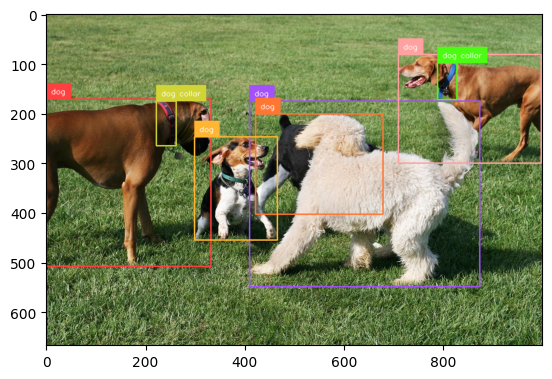

In [29]:
# - Image Sample Inference
# image = cv2.imread(str(data[0]['image']))

# image = image.reshape(image.shape[2], image.shape[0], image.shape[1])
image_cv2 = cv2.imread("dog-parks-san-diego.jpg")
image = Image.fromarray(image_cv2)
image_open = np.array(Image.open("dog-parks-san-diego.jpg"))
image = Image.fromarray(np.array(image_open))
task = "<OD>"
text = "<OD>"


inputs = processor(
    text=text, 
    images=image, 
    return_tensors="pt"
).to(DEVICE)
generated_ids = model.generate(
    input_ids=inputs["input_ids"],
    pixel_values=inputs["pixel_values"],
    max_new_tokens=1024,
    num_beams=3)
generated_text = processor.batch_decode(
    generated_ids, skip_special_tokens=False)[0]
response = processor.post_process_generation(
    generated_text, 
    task=task, 
    image_size=image.size)
detections = sv.Detections.from_lmm(
    sv.LMM.FLORENCE_2, response, resolution_wh=image.size)

bounding_box_annotator = sv.BoxAnnotator(
    color_lookup=sv.ColorLookup.INDEX)
label_annotator = sv.LabelAnnotator(
    color_lookup=sv.ColorLookup.INDEX)

image = bounding_box_annotator.annotate(image, detections)
image = label_annotator.annotate(image, detections)
plt.imshow(image)

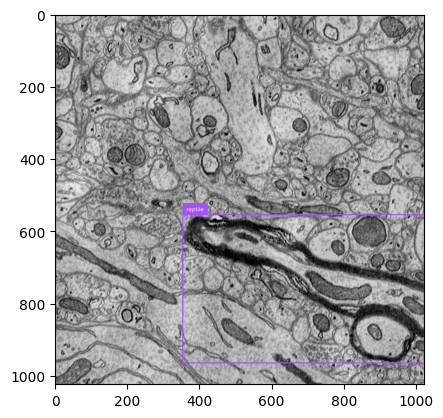

In [30]:
# - EM Image Sample Inference
image = cv2.imread(str(data[0]['image']))
image = Image.fromarray(image)
task = "<OD>"
text = "<OD>"

inputs = processor(
    text=text, 
    images=image, 
    return_tensors="pt"
).to(DEVICE)
generated_ids = model.generate(
    input_ids=inputs["input_ids"],
    pixel_values=inputs["pixel_values"],
    max_new_tokens=1024,
    num_beams=3)
generated_text = processor.batch_decode(
    generated_ids, skip_special_tokens=False)[0]
response = processor.post_process_generation(
    generated_text, 
    task=task, 
    image_size=image.size)
detections = sv.Detections.from_lmm(
    sv.LMM.FLORENCE_2, response, resolution_wh=image.size)

bounding_box_annotator = sv.BoxAnnotator(
    color_lookup=sv.ColorLookup.INDEX)
label_annotator = sv.LabelAnnotator(
    color_lookup=sv.ColorLookup.INDEX)

image = bounding_box_annotator.annotate(image, detections)
image = label_annotator.annotate(image, detections)
plt.imshow(image)

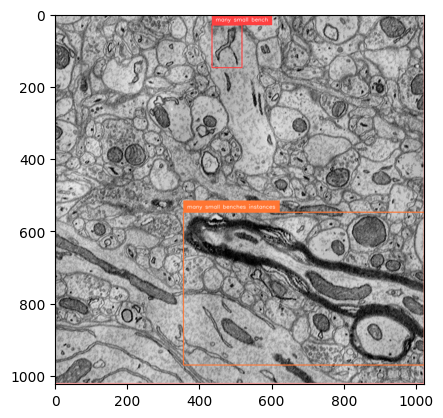

In [31]:


image = cv2.imread(str(data[0]['image']))
image = Image.fromarray(image)
task = "<CAPTION_TO_PHRASE_GROUNDING>"
text = "<CAPTION_TO_PHRASE_GROUNDING> In this brain slice electron microscopy image, we can see many small neuron instances"

inputs = processor(
    text=text, 
    images=image, 
    return_tensors="pt"
).to(DEVICE)
generated_ids = model.generate(
    input_ids=inputs["input_ids"],
    pixel_values=inputs["pixel_values"],
    max_new_tokens=1024,
    num_beams=3)
generated_text = processor.batch_decode(
    generated_ids, skip_special_tokens=False)[0]
response = processor.post_process_generation(
    generated_text, 
    task=task, 
    image_size=image.size)
detections = sv.Detections.from_lmm(
    sv.LMM.FLORENCE_2, response, resolution_wh=image.size)

bounding_box_annotator = sv.BoxAnnotator(
    color_lookup=sv.ColorLookup.INDEX)
label_annotator = sv.LabelAnnotator(
    color_lookup=sv.ColorLookup.INDEX)

image = bounding_box_annotator.annotate(image, detections)
image = label_annotator.annotate(image, detections)
plt.imshow(image)

In [32]:
# - Dataset and Dataload initialization
# - Detection Dataset Class (Dataset Preparation)
class DetectionDataset(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        data = self.dataset[idx]
        image = cv2.imread(str(data['image']))
        prefix = data['prefix']
        suffix = data['suffix']
        return prefix, suffix, image

# - Define Dataloader
BATCH_SIZE = 6
NUM_WORKERS = 0

def collate_fn(batch):
    questions, answers, images = zip(*batch)
    inputs = processor(text=list(questions), images=list(images), return_tensors="pt", padding=True).to(DEVICE)
    return inputs, answers

train_dataset = DetectionDataset(train_dataset)
val_dataset = DetectionDataset(val_dataset)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, collate_fn=collate_fn, num_workers=NUM_WORKERS, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, collate_fn=collate_fn, num_workers=NUM_WORKERS, shuffle=False)

In [33]:
# - Lora Finetuning Configuration
from peft import LoraConfig, get_peft_model

TARGET_MODULES = [
    "q_proj", "o_proj", "k_proj", "v_proj", 
    "linear", "Conv2d", "lm_head", "fc2"
]

config = LoraConfig(
    r=8,
    lora_alpha=8,
    target_modules=TARGET_MODULES,
    task_type="CAUSAL_LM",
    lora_dropout=0.05,
    bias="none",
    inference_mode=False,
    use_rslora=True,
    init_lora_weights="gaussian",
    revision=REVISION
)

peft_model = get_peft_model(model, config)
peft_model.print_trainable_parameters()

trainable params: 1,929,928 || all params: 272,733,896 || trainable%: 0.7076



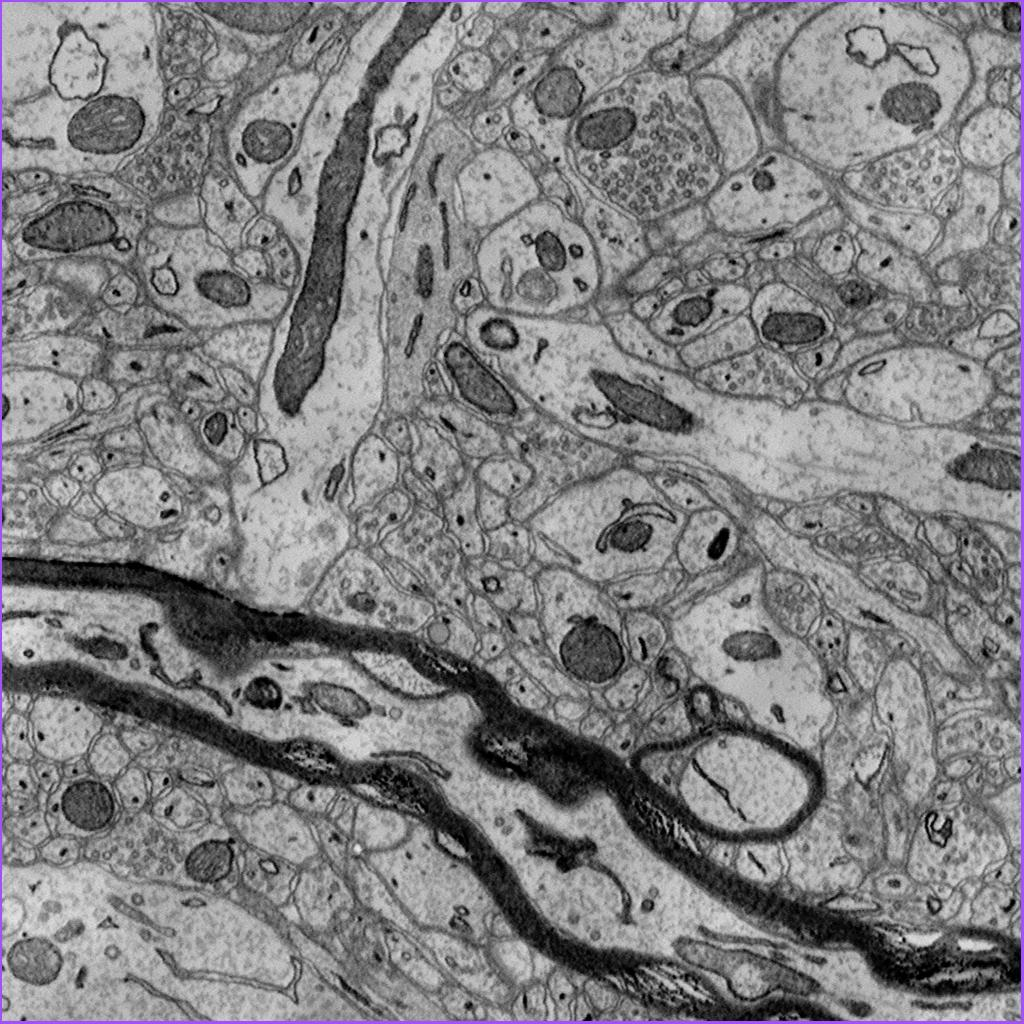
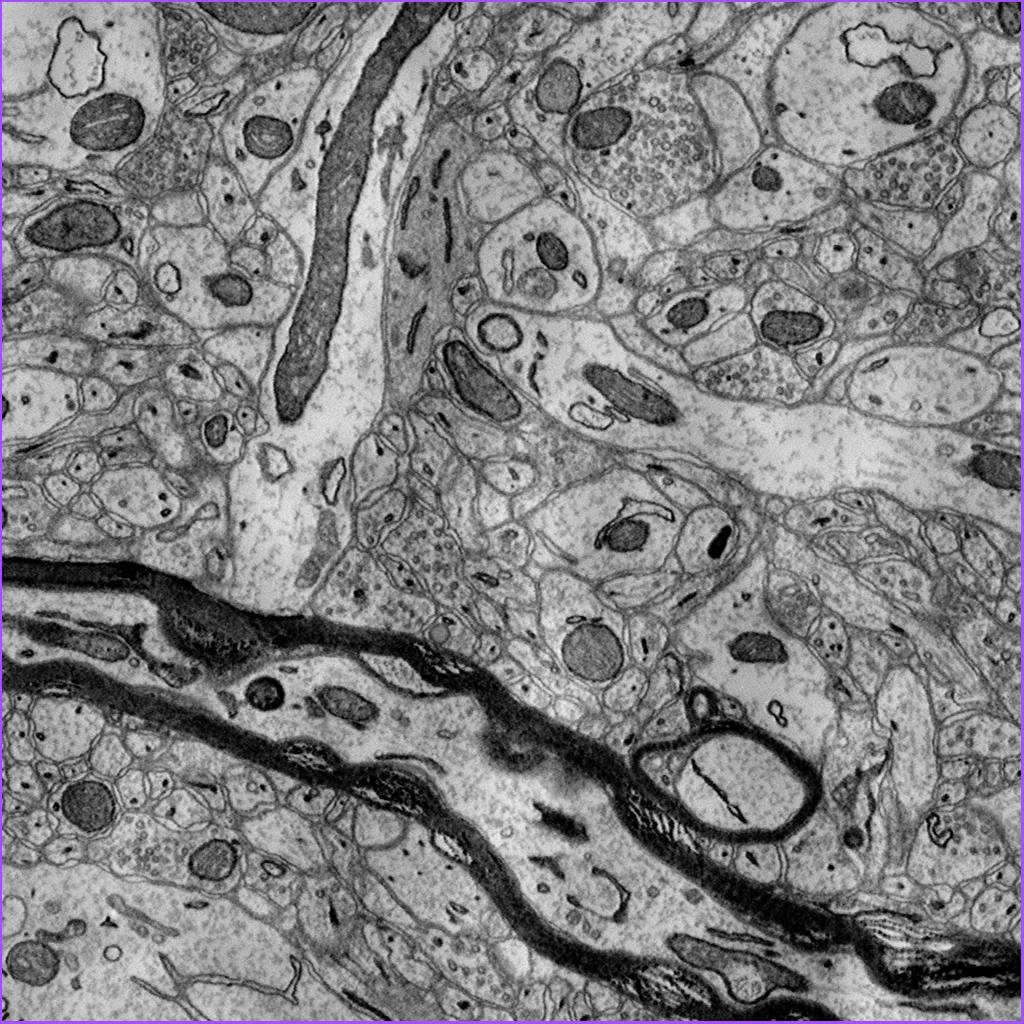
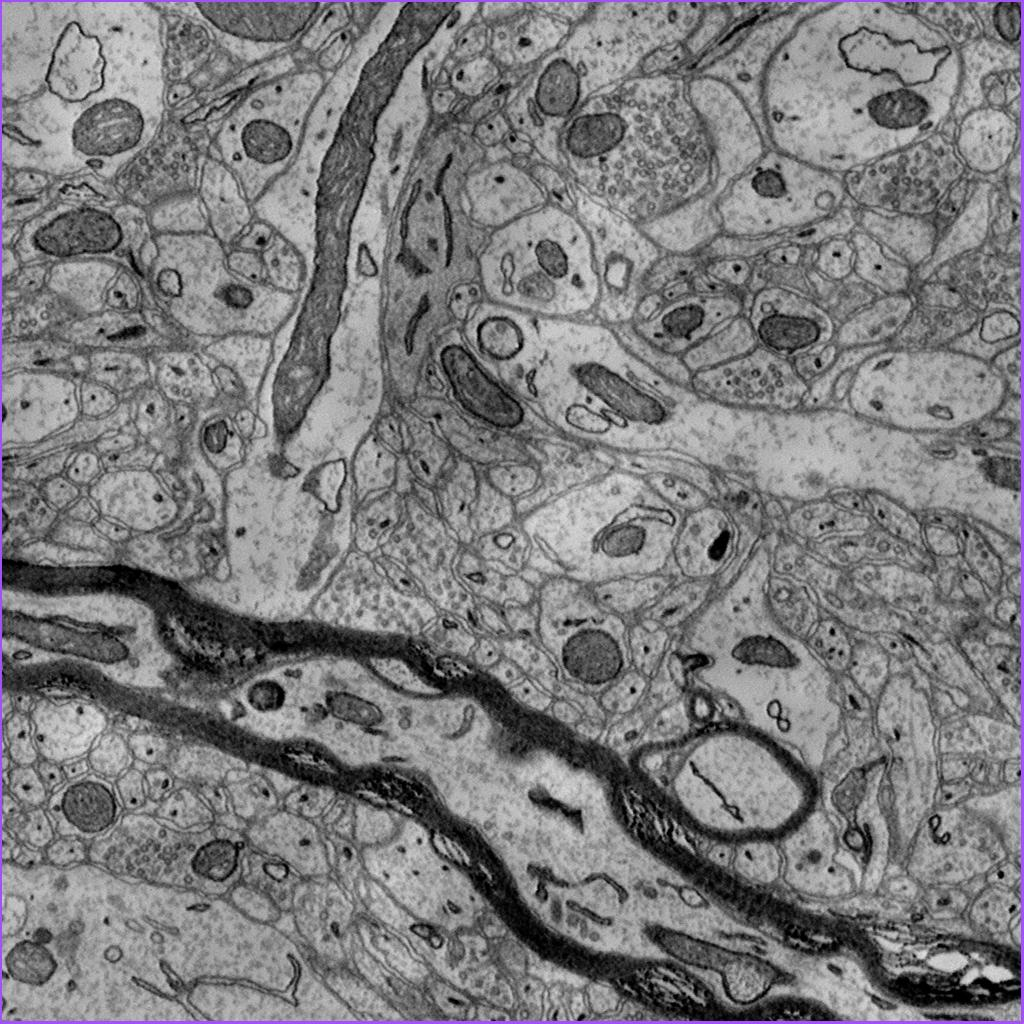
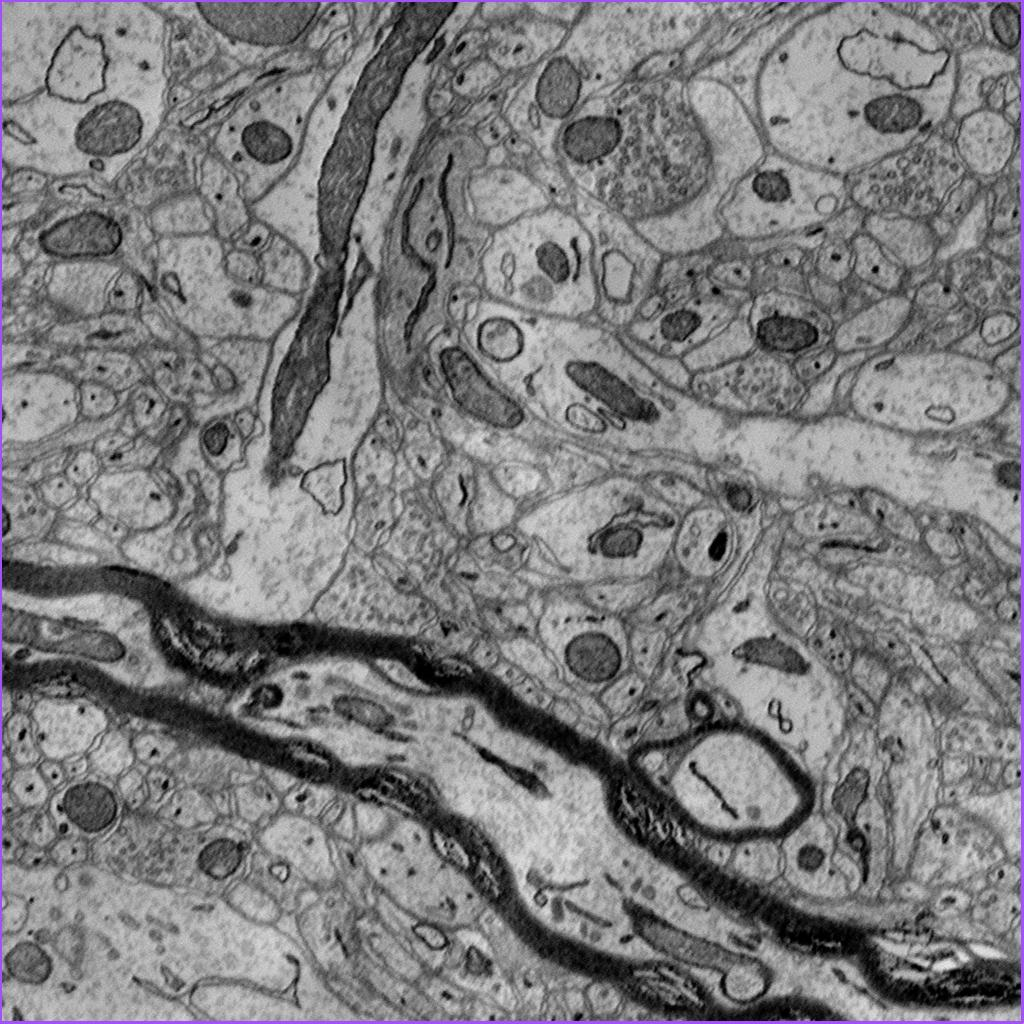

In [34]:
# @title Run inference with pre-trained Florence-2 model on validation dataset
import io
import base64
import html
import json
from IPython.display import HTML
def render_inline(image: Image.Image, resize=(128, 128)):
    """Convert image into inline html."""
    image.resize(resize)
    with io.BytesIO() as buffer:
        image.save(buffer, format='jpeg')
        image_b64 = str(base64.b64encode(buffer.getvalue()), "utf-8")
        return f"data:image/jpeg;base64,{image_b64}"


def render_example(image: Image.Image, response):
    try:
        detections = sv.Detections.from_lmm(sv.LMM.FLORENCE_2, response, resolution_wh=image.size)
        image = sv.BoxAnnotator(color_lookup=sv.ColorLookup.INDEX).annotate(image.copy(), detections)
        image = sv.LabelAnnotator(color_lookup=sv.ColorLookup.INDEX).annotate(image, detections)
    except:
        print('failed to redner model response')
    return f"""
<div style="display: inline-flex; align-items: center; justify-content: center;">
    <img style="width:256px; height:256px;" src="{render_inline(image, resize=(128, 128))}" />
    <p style="width:512px; margin:10px; font-size:small;">{html.escape(json.dumps(response))}</p>
</div>
"""


def render_inference_results(model, dataset: DetectionDataset, count: int):
    html_out = ""
    count = min(count, len(dataset))
    for i in range(count):
        data = dataset.dataset[i]
        image = cv2.imread(str(data['image']))
        image = Image.fromarray(image)
        prefix = data['prefix']
        suffix = data['suffix']
        inputs = processor(text=prefix, images=image, return_tensors="pt").to(DEVICE)
        generated_ids = model.generate(
            input_ids=inputs["input_ids"],
            pixel_values=inputs["pixel_values"],
            max_new_tokens=1024,
            num_beams=3
        )
        generated_text = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
        answer = processor.post_process_generation(generated_text, task='<OD>', image_size=image.size)
        html_out += render_example(image, answer)

    display(HTML(html_out))

render_inference_results(peft_model, val_dataset, 4)

In [35]:
# - define training loop
from tqdm import tqdm
def train_model(train_loader, val_loader, model, processor, epochs=10, lr=1e-6):
    optimizer = AdamW(model.parameters(), lr=lr)
    num_training_steps = epochs * len(train_loader)
    lr_scheduler = get_scheduler(
        name="linear",
        optimizer=optimizer,
        num_warmup_steps=0,
        num_training_steps=num_training_steps,
    )

    render_inference_results(peft_model, val_loader.dataset, 6)

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for inputs, answers in tqdm(train_loader, desc=f"Training Epoch {epoch + 1}/{epochs}"):

            input_ids = inputs["input_ids"]
            pixel_values = inputs["pixel_values"]
            labels = processor.tokenizer(
                text=answers,
                return_tensors="pt",
                padding=True,
                return_token_type_ids=False
            ).input_ids.to(DEVICE)

            outputs = model(input_ids=input_ids, pixel_values=pixel_values, labels=labels)
            loss = outputs.loss

            loss.backward(), optimizer.step(), lr_scheduler.step(), optimizer.zero_grad()
            train_loss += loss.item()

        avg_train_loss = train_loss / len(train_loader)
        print(f"Average Training Loss: {avg_train_loss}")

        model.eval()
        val_loss = 0
        with torch.no_grad():
            for inputs, answers in tqdm(val_loader, desc=f"Validation Epoch {epoch + 1}/{epochs}"):

                input_ids = inputs["input_ids"]
                pixel_values = inputs["pixel_values"]
                labels = processor.tokenizer(
                    text=answers,
                    return_tensors="pt",
                    padding=True,
                    return_token_type_ids=False
                ).input_ids.to(DEVICE)

                outputs = model(input_ids=input_ids, pixel_values=pixel_values, labels=labels)
                loss = outputs.loss

                val_loss += loss.item()

            avg_val_loss = val_loss / len(val_loader)
            print(f"Average Validation Loss: {avg_val_loss}")

            render_inference_results(peft_model, val_loader.dataset, 6)
        if epoch % 100 == 0:
            output_dir = f"./model_checkpoints/epoch_{epoch+1}"
            os.makedirs(output_dir, exist_ok=True)
            model.save_pretrained(output_dir)
            processor.save_pretrained(output_dir)


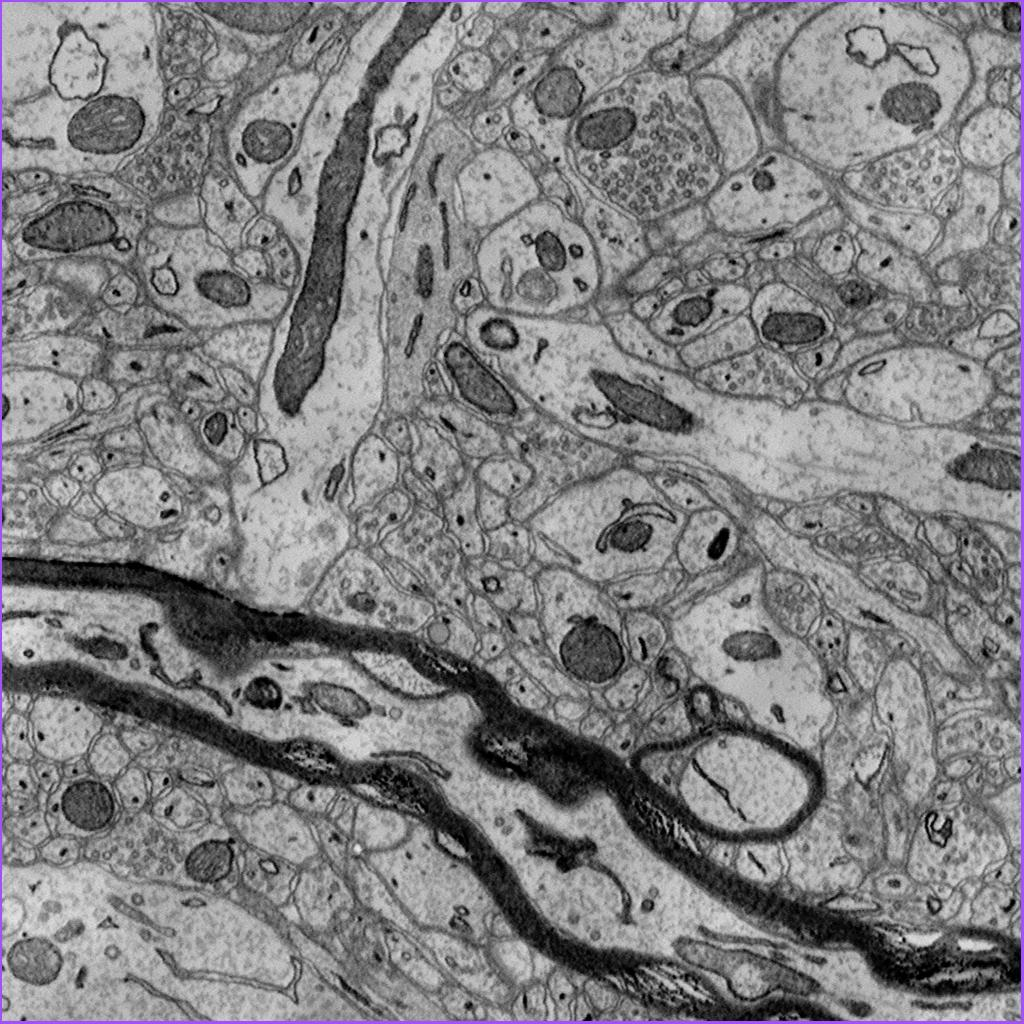
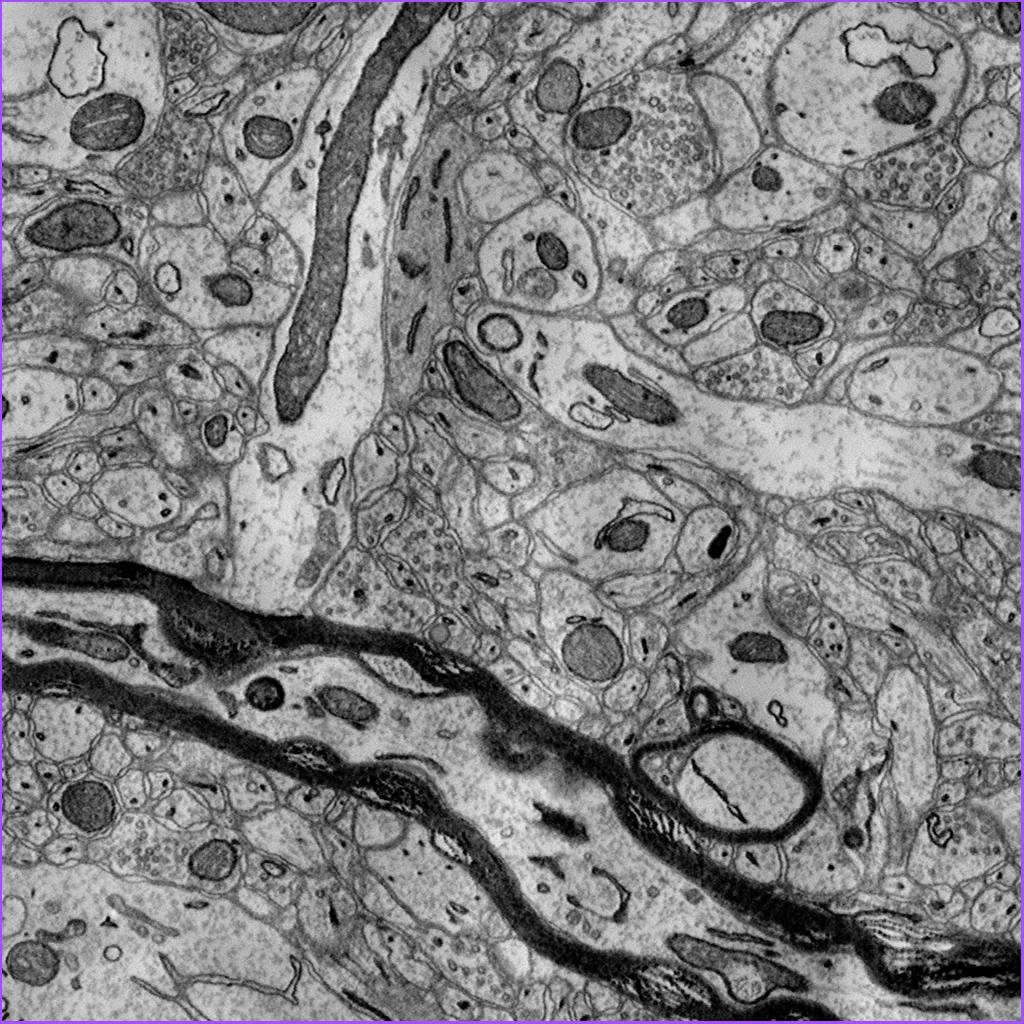
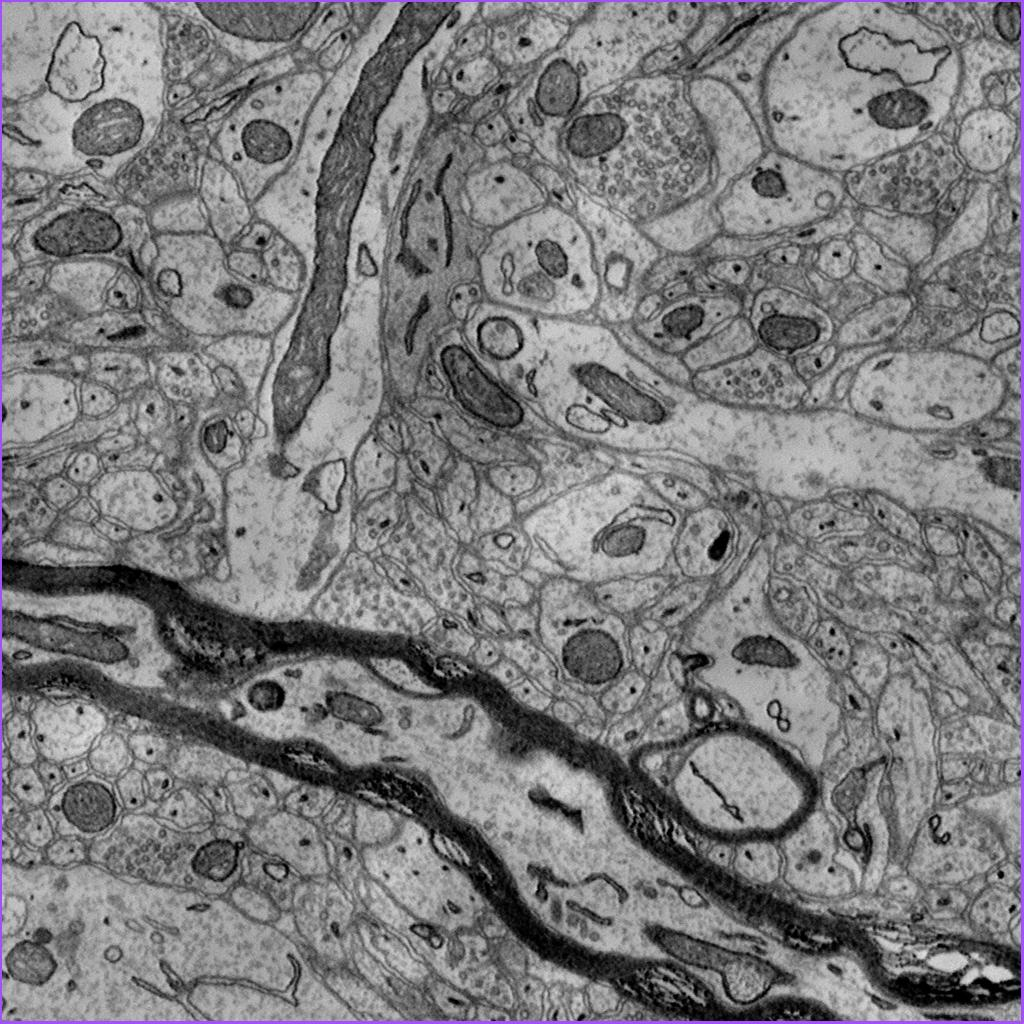
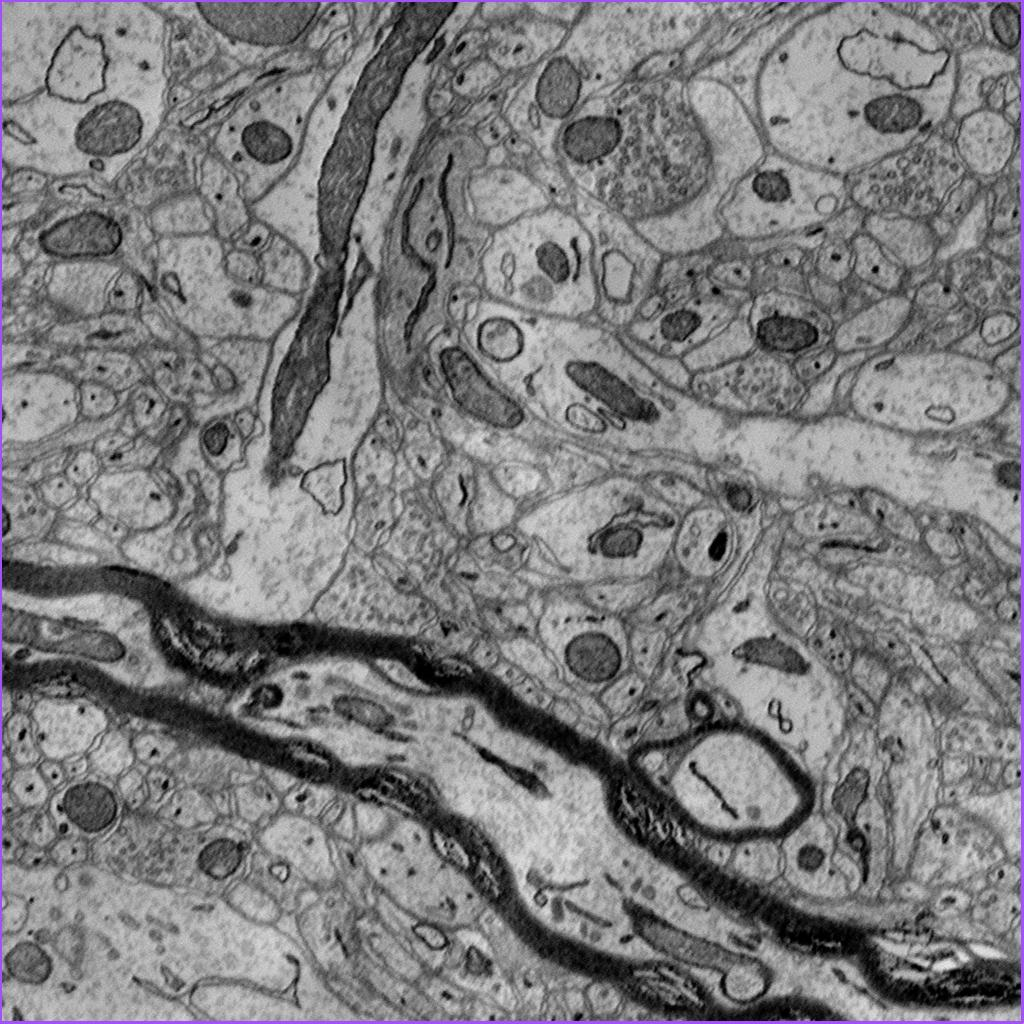
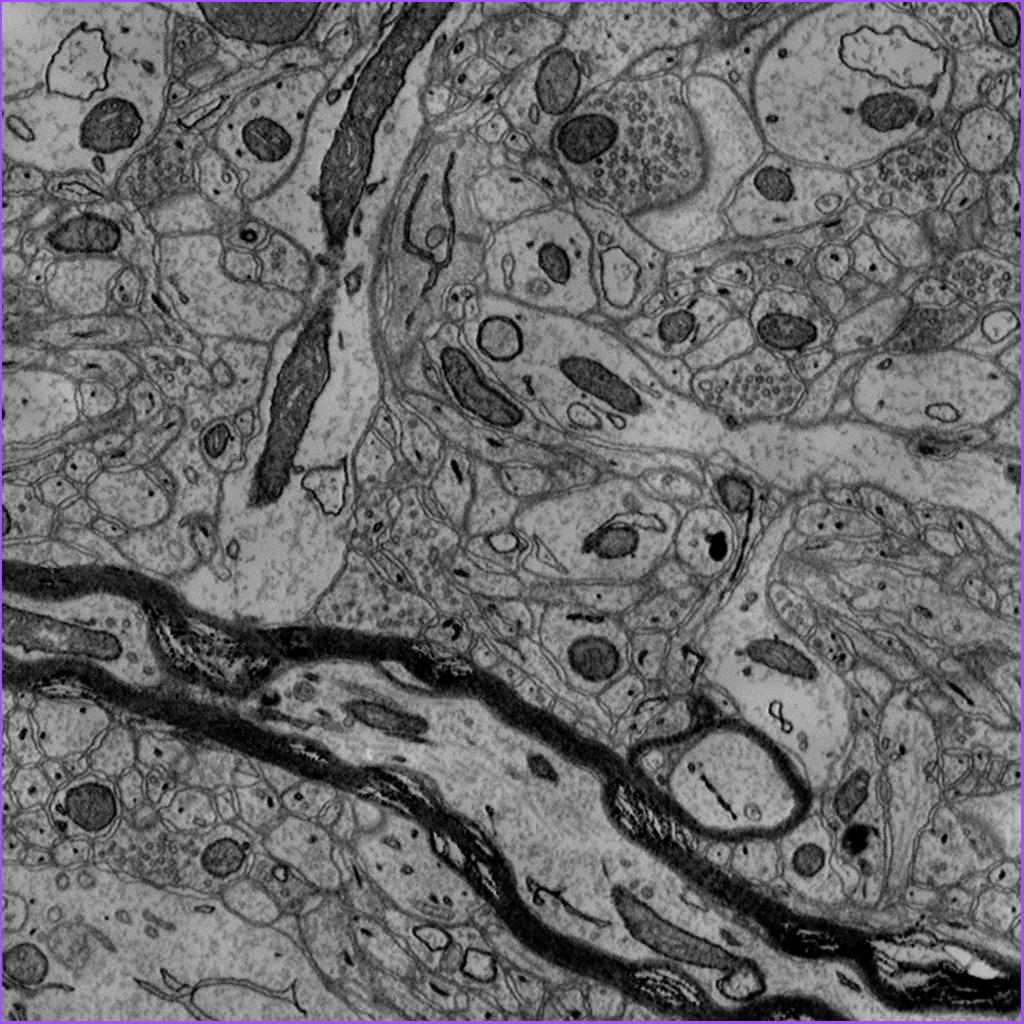
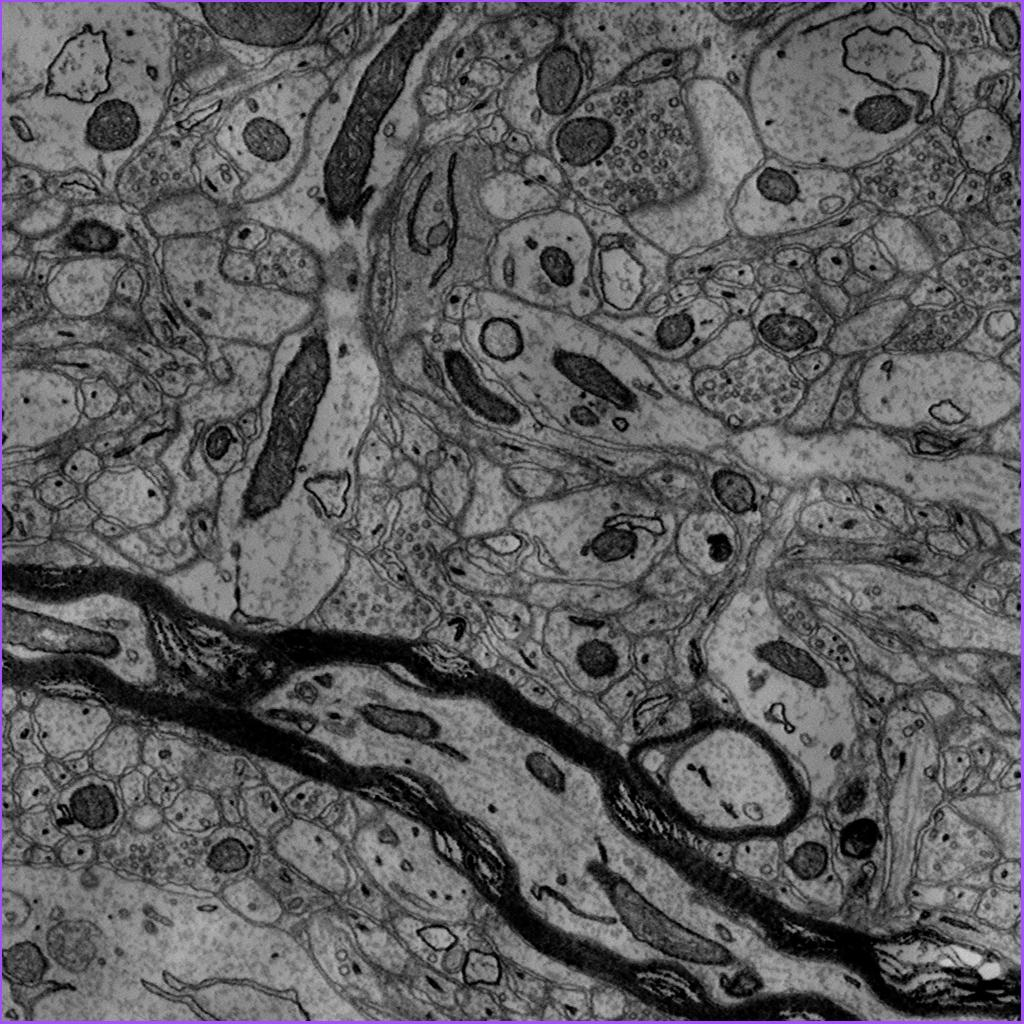

Training Epoch 1/1000:   7%|▋         | 1/14 [00:24<05:14, 24.16s/it]

In [36]:
# @title Run train loop

EPOCHS = 1000
LR = 5e-6

train_model(train_loader, val_loader, peft_model, processor, epochs=EPOCHS, lr=LR)